## **JPEG Implementation.**

###Library Imports

In [ ]:
# Importing libraries.

import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
from scipy import fft
import cv2
from sklearn.metrics import mean_squared_error
import math

import io
from PIL import Image
import os


###Image Read

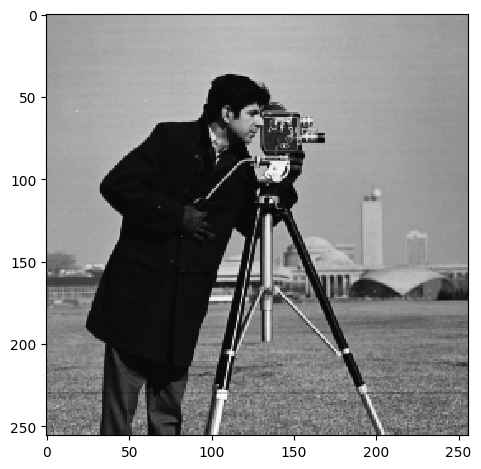

In [ ]:
from skimage import io

# Read the image
image = io.imread("/content/cameraman.tif")

# Display the image
io.imshow(image)


###Quantization Block

In [ ]:
# Building quantization matrix to quantize each DCT coefficient in a given 8x8 block.

Q = np.array([[16 ,11 ,10 ,16 ,24 ,40 ,51 ,61],[12 ,12 ,14 ,19 ,26 ,58 ,60 ,55],
              [14 ,13 ,16 ,24 ,40 ,57 ,69 ,56],[14 ,17 ,22 ,29 ,51 ,87 ,80 ,62],
              [18 ,22 ,37 ,56 ,68 ,109 ,103 ,77],[24 ,35 ,55 ,64 ,81 ,104 ,113 ,92],
              [49 ,64 ,78 ,87 ,103 ,121 ,120 ,101],[72 ,92 ,95 ,98 ,112 ,100 ,103 ,99]])

print(" The quantization matrix to quantize each DCT coefficient in a given 8x8 block is as follows \n", Q)

 The quantization matrix to quantize each DCT coefficient in a given 8x8 block is as follows 
 [[ 16  11  10  16  24  40  51  61]
 [ 12  12  14  19  26  58  60  55]
 [ 14  13  16  24  40  57  69  56]
 [ 14  17  22  29  51  87  80  62]
 [ 18  22  37  56  68 109 103  77]
 [ 24  35  55  64  81 104 113  92]
 [ 49  64  78  87 103 121 120 101]
 [ 72  92  95  98 112 100 103  99]]


###Compression

In [ ]:
def image_compress(image, Q):
    """
    This function performs the Transform and Quantization step of JPEG
    using the Quantization matrix and compresses image.
    """

    # creating a zero-filled array to store the compressed image
    compressed_image = np.zeros(image.shape)
    # getting the dimensions of the input image
    rows, cols = image.shape

    # iterating over non-overlapping blocks
    for i in range(0, rows, 8):
        for j in range(0, cols, 8):
            # extracting an 8x8 block of the image
            block = image[i: i + 8, j: j + 8]

            # applying DCT to the block
            dct_block = cv2.dct(block.astype('float') / 255)
            # scaling the DCT coefficients
            dct_block = dct_block * 255

            # dividing the coefficients by Q and adding 0.5 to each value
            quantized_block = (dct_block / Q) + 0.5
            # rounding down the resulting values
            quantized_block = np.floor(quantized_block)

            # storing the resulting quantized DCT coefficients in the output array
            compressed_image[i: i + 8, j: j + 8] = quantized_block

    return compressed_image


###DeCompression

In [ ]:
def imageDeCompress(compressed_image, quantization_matrix):
    """
    This function performs the Transform and Quantization step of JPEG
    using the Quantization matrix and decompresses image.
    """

    # Creating a zero-filled array to store the decompressed image
    result = np.zeros(compressed_image.shape)
    # Getting the dimensions of the input image
    rows, cols = compressed_image.shape

    # Iterating over non-overlapping blocks
    for i in range(0, rows, 8):
        for j in range(0, cols, 8):
            # Extracting an 8x8 block of the compressed image
            block = compressed_image[i: i + 8, j: j + 8]

            # Multiplying the quantized DCT coefficients by quantization_matrix and applying inverse DCT
            dct_block = block * quantization_matrix
            dct_block = cv2.idct(dct_block)
            result[i: i + 8, j: j + 8] = dct_block

    # Clipping the values to the range [0, 255] and converting to uint8 type
    result = (result.clip(0, 255)).astype('uint8')

    return result


### Image Plotting

In [ ]:
def image_plotting():
    """
    Function to show the original, compressed, and decompressed images after JPEG implementation
    using Quantization Matrix Q.
    """
    # Original image
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    axs[0].imshow(image, cmap='gray')
    axs[0].set_title("Original Image")

    # Compressed image
    # Compressing the image using the input Quantization matrix Q and compressFlag = 1
    comp = image_compress(image, Q )
    axs[1].imshow(comp, cmap='gray')
    axs[1].set_title("Compressed Image")

    # Decompressed image
    # Decompressing the compressed image using the same Quantization matrix parameters a,b,c and compressFlag = 0
    decomp = imageDeCompress(comp, Q)
    axs[2].imshow(decomp, cmap='gray')
    axs[2].set_title("Reconstructed Image")

    plt.show()

    # Returning the compressed and decompressed images as output
    return comp , decomp

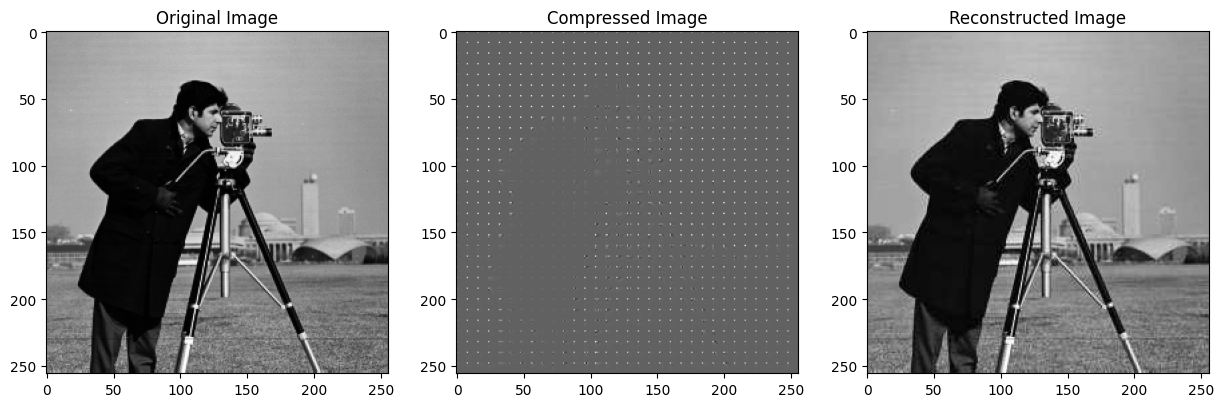

In [ ]:
# Showing the Original , Compressed and Decompressed Image after JPEG implementation.
compressed_image , decompressed_image = image_plotting()

### ZOOMED

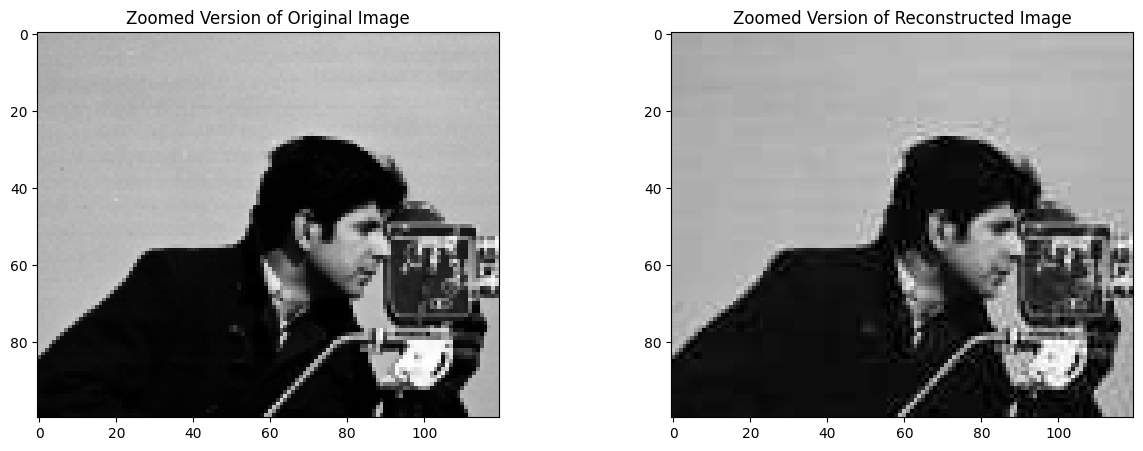

In [ ]:
# Showing the Zoomed in versions of Original and Decompressed Image.
fig, axs = plt.subplots(1, 2 , figsize=(15, 5))
axs[0].imshow(image[10:110,40:160],cmap='gray')
axs[0].set_title("Zoomed Version of Original Image")
axs[1].imshow(decompressed_image[10:110,40:160],cmap='gray')
axs[1].set_title("Zoomed Version of Reconstructed Image")
plt.show()

###Mean Squared Error

In [ ]:
# Calculate the mean squared error between the original image and the decompressed image
mean_sq_err = mean_squared_error(decompressed_image, image)

# Print the mean squared error between the original and reconstructed image
print("Mean Squared Error between the Original and Reconstructed Image: ", mean_sq_err)

Mean Squared Error between the Original and Reconstructed Image:  25.960464477539062


###Decimal To Binary

In [ ]:
def get_binary(n):
    """
    This function takes a decimal number as input and returns the binary representation of that number as a string.
    """
    if n == 0:
        return '0'

    binary_string = ''
    while n > 0:
        binary_string = str(n % 2) + binary_string
        n //= 2
    return binary_string

### Zigzag

In [ ]:
def zigzag_traversal(patch):
    """
    Reads values from an 8x8 matrix in zigzag order and returns them as a 1D array.

    Args:
        patch (numpy.ndarray): An 8x8 matrix.

    Returns:
        output (list): A 1D array containing the elements of the input matrix
                       read in zigzag order.

    Raises:
        None.
    """
    if patch.shape != (8,8):
        print("Wrong patch dimensions. Should be 8x8")
        exit()

    output = []
    i, j = 0, 0
    direction = 1

    for _ in range(8 * 8):
        output.append(patch[i, j])

        if direction == 1:
            if j == 7:
                i += 1
                direction = -1
            elif i == 0:
                j += 1
                direction = -1
            else:
                i -= 1
                j += 1
        else:
            if i == 7:
                j += 1
                direction = 1
            elif j == 0:
                i += 1
                direction = 1
            else:
                i += 1
                j -= 1

    return output


###Encoding

In [ ]:
def encode_patch(patch):
    """
    Encode an 8x8 matrix (patch) using a zigzag pattern.

    Args:
    - patch: an 8x8 matrix of integers

    Returns:
    - encoded: a string representing the encoded patch
    """
    encoded = ''
    # Read the matrix in a zigzag pattern
    unraveled = zigzag_traversal(patch)

    # Iterate through the unraveled array and encode each value
    for q_index in unraveled:
        if q_index == 0:
            encoded += '0'  # If value is 0, add a 0 to the encoded string
        else:
            # Calculate the prefix code
            power = math.floor(math.log2(abs(q_index))) + 1
            prefix_code = ('1' * power) + '0'

            # Calculate the suffix code based on the sign of the value
            if q_index < 0:
                q_index += 2**power - 1
            # suffix_code = format(q_index, '0' + str(power) + 'b')
            suffix_code = format(int(q_index), '0' + str(power) + 'b')


            # Concatenate the prefix and suffix codes to form the final code
            encoded += prefix_code + suffix_code

    return encoded


def encode_image(image_matrix, quantization_matrix):
    """
    Encode an image matrix by breaking it down into 8x8 patches and encoding each patch using a zigzag pattern.

    Args:
    - image_matrix: a matrix representing an image
    - quantization_matrix: a quantization matrix

    Returns:
    - encoded_image_bitstring: a string representing the encoded image
    """
    encoded_image_bitstring = ''

    # Apply DCT and quantization to the image
    quantized_image = image_compress(image_matrix, quantization_matrix)

    # Iterate through each 8x8 patch of the image
    for i in range(image_matrix.shape[0] // 8):
        for j in range(image_matrix.shape[1] // 8):
            quantized_patch = quantized_image[i * 8:(i + 1) * 8, j * 8:(j + 1) * 8]

            # Encode the quantized patch using zigzag pattern
            patch_code = encode_patch(quantized_patch)


            # Add the encoded patch to the encoded image bitstring
            encoded_image_bitstring += patch_code

    return encoded_image_bitstring


###Encoding

In [ ]:
# Calculate the length of the bit string of the encoded image
encoded_image_bitstring_len = len(encode_image(image , Q))

# Calculate the number of bits required to store the original image
bits_image_len = image.size * image.itemsize * 8

# Calculate the compression ratio of the image
compression_ratio = bits_image_len / encoded_image_bitstring_len

# Print the original image file size in bits, compressed image file size in bits, and the compression ratio
print("Original Image file size in bits: ", bits_image_len)
print("Compressed Image file size in bits: ", encoded_image_bitstring_len)
print("Compression ratio: ", compression_ratio)


Original Image file size in bits:  524288
Compressed Image file size in bits:  108260
Compression ratio:  4.842859782006281


###In Built function

In [ ]:
import io
# Define the desired MSE
desired_mse = mean_sq_err

# Save the original image with Pillow
original_image = Image.open("cameraman.tif")

# Save the image with varying JPEG quality to achieve desired MSE
quality = 100  # Initial quality
while True:
    buffer = io.BytesIO()
    original_image.save(buffer, format="JPEG", quality=quality)
    buffer.seek(0)
    compressed_image = Image.open(buffer)
    compressed_image_arr = np.array(compressed_image.convert("L"))
    compressed_mse = np.mean((image - compressed_image_arr) ** 2)
    if compressed_mse >= desired_mse:
        break
    quality -= 1

# Get the size of the compressed image
compressed_file_size = len(buffer.getvalue()) * 8
print(f"Quality for similar MSE is : {quality} ")
print("Compressed file size with default JPEG compression:", compressed_file_size, "bits")
print("Compression Ratio : ",bits_image_len / compressed_file_size)

Quality for similar MSE is : 49 
Compressed file size with default JPEG compression: 56984 bits
Compression Ratio :  9.200617717253966


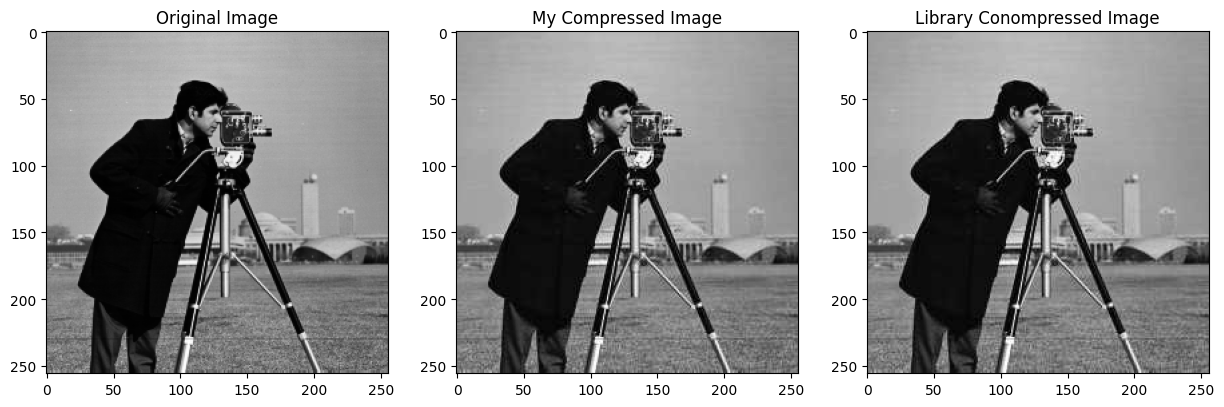

In [ ]:
    """
    Function to show the original, compressed, and decompressed images after JPEG implementation
    using Quantization Matrix Q.
    """
    # Original image
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    axs[0].imshow(image, cmap='gray')
    axs[0].set_title("Original Image")

    # Compressed image
    # Compressing the image using the input Quantization matrix Q and compressFlag = 1
    comp = image_compress(image, Q )
    axs[1].imshow(decompressed_image, cmap='gray')
    axs[1].set_title("My Compressed Image")

    # Decompressed image
    # Decompressing the compressed image using the same Quantization matrix parameters a,b,c and compressFlag = 0
    decomp = imageDeCompress(comp, Q)
    axs[2].imshow(compressed_image, cmap='gray')
    axs[2].set_title("Library Conompressed Image")

    plt.show()

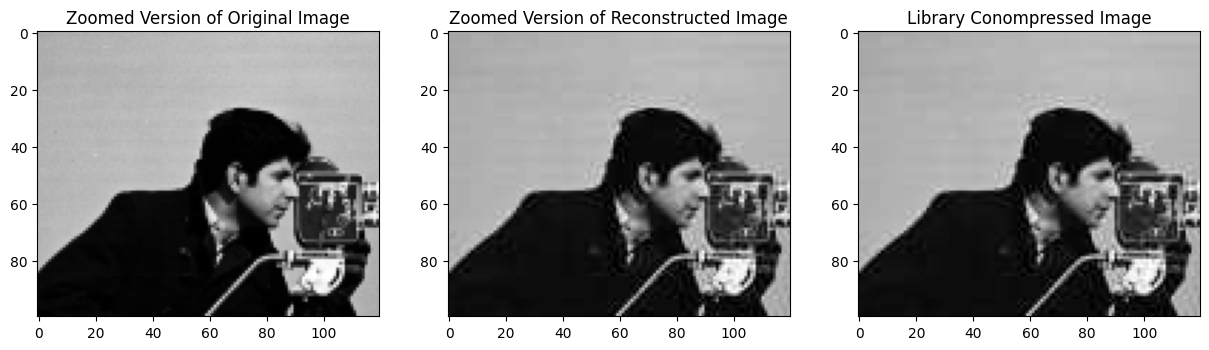

In [ ]:
# Showing the Zoomed in versions of Original and Decompressed Image.
fig, axs = plt.subplots(1, 3 , figsize=(15, 5))
axs[0].imshow(image[10:110,40:160],cmap='gray')
axs[0].set_title("Zoomed Version of Original Image")
axs[1].imshow(decompressed_image[10:110,40:160],cmap='gray')
axs[1].set_title("Zoomed Version of Reconstructed Image")
axs[2].imshow(compressed_image_arr[10:110,40:160],cmap='gray')
axs[2].set_title("Library Conompressed Image")
plt.show()